# Flare 2017/09/06 9u

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2017-09-06/fits/"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_3950_2017-09-06T09_04_20_09_04_20=0-399_mixed_corrected_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Wed Apr 26 17:35:06 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1681 / Number of positions along axis 1               
NAXIS2  =                 1936 / Number of positions along axis 2               
NAXIS3  =                   20 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                  400 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
TIMESYS = 'UTC     '           /                                                
DATE    = '2023-04-28T10:29:57' / Creation UTC date of FITS header              
VAR_KEYS= 'VAR-EXT-PRSTEP1;PRSTEP1,VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRREF1;PRRE&'
CONTINUE  'F1,VAR-EXT-DATE-B

In [5]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[7].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaK.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001C0DEE34EC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED5B650>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED5BD70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED73B00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED73470>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001C0DED72B40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED708F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED719A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED70F80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED72270>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED71310>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED73DA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED9C050>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C0DED9E150>, <astropy.io.fits.hdu.ta

In [6]:
pos[0][0][:,:,0,0,2][0]

array([393.27104969, 393.28609769, 393.30600969, 393.31604169,
       393.32607369, 393.33610569, 393.34613769, 393.35601769,
       393.36407369, 393.37106569, 393.37805769, 393.38611369,
       393.39599369, 393.40602569, 393.41605769, 393.42608969,
       393.43612169, 393.45603369, 393.47108169, 400.114744  ],
      dtype='>f8')

In [7]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('36.50175',
 array(['2017-09-06T09:04:21.79595', '2017-09-06T09:04:29.02931',
        '2017-09-06T09:04:36.50175', '2017-09-06T09:04:43.94478',
        '2017-09-06T09:04:51.22176', '2017-09-06T09:04:58.07962',
        '2017-09-06T09:05:04.78714', '2017-09-06T09:05:11.69016',
        '2017-09-06T09:05:18.90761', '2017-09-06T09:05:25.69007',
        '2017-09-06T09:05:32.47303', '2017-09-06T09:05:39.28585',
        '2017-09-06T09:05:46.15888', '2017-09-06T09:05:53.22591',
        '2017-09-06T09:06:00.11413', '2017-09-06T09:06:07.73707',
        '2017-09-06T09:06:15.53935', '2017-09-06T09:06:23.04255',
        '2017-09-06T09:06:30.89070', '2017-09-06T09:06:38.24349',
        '2017-09-06T09:06:46.67680', '2017-09-06T09:06:54.91539',
        '2017-09-06T09:07:03.24320', '2017-09-06T09:07:10.97031',
        '2017-09-06T09:07:18.39834', '2017-09-06T09:07:26.74192',
        '2017-09-06T09:07:34.96513', '2017-09-06T09:07:42.85849',
        '2017-09-06T09:07:51.95117', '2017-09-06T09:07:59.57404

In [8]:
time_list = [t[11:] for t in tlist3]
time_list

['09:04:21.79595',
 '09:04:29.02931',
 '09:04:36.50175',
 '09:04:43.94478',
 '09:04:51.22176',
 '09:04:58.07962',
 '09:05:04.78714',
 '09:05:11.69016',
 '09:05:18.90761',
 '09:05:25.69007',
 '09:05:32.47303',
 '09:05:39.28585',
 '09:05:46.15888',
 '09:05:53.22591',
 '09:06:00.11413',
 '09:06:07.73707',
 '09:06:15.53935',
 '09:06:23.04255',
 '09:06:30.89070',
 '09:06:38.24349',
 '09:06:46.67680',
 '09:06:54.91539',
 '09:07:03.24320',
 '09:07:10.97031',
 '09:07:18.39834',
 '09:07:26.74192',
 '09:07:34.96513',
 '09:07:42.85849',
 '09:07:51.95117',
 '09:07:59.57404',
 '09:08:08.21830',
 '09:08:17.50557',
 '09:08:25.33887',
 '09:08:33.45738',
 '09:08:41.44120',
 '09:08:49.27331',
 '09:08:58.23218',
 '09:09:06.84527',
 '09:09:14.82842',
 '09:09:23.99671',
 '09:09:31.46962',
 '09:09:39.66329',
 '09:09:47.87075',
 '09:09:55.74925',
 '09:10:04.27174',
 '09:10:12.46516',
 '09:10:19.80299',
 '09:10:28.74690',
 '09:10:36.65488',
 '09:10:44.56245',
 '09:10:52.62125',
 '09:11:01.15898',
 '09:11:09.5

In [9]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [10]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (20, 1936, 1681)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2017-09-06/fits/nb_3950_2017-09-06T09_04_20_09_04_20=0-399_mixed_corrected_im.fits
s=(20, 1936, 1681)
the shape of the data is (400, '??', 20, 1936, 1681)
the wavelengths are self._wavel = array([3932.71049692, 3932.86097692, 3933.06009692, 3933.16041692,
       3933.26073692, 3933.36105692, 3933.46137691, 3933.56017691,
       3933.64073691, 3933.71065691, 3933.78057691, 3933.86113691,
       3933.95993691, 3934.06025691, 3934.16057691, 3934.2608969 ,
       3934.3612169 , 3934.5603369 , 3934.7108169 , 4001.14743998])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


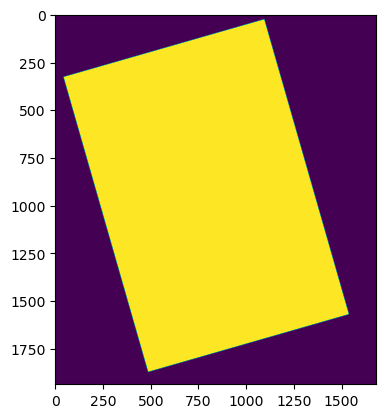

calculated boundary at frame 50


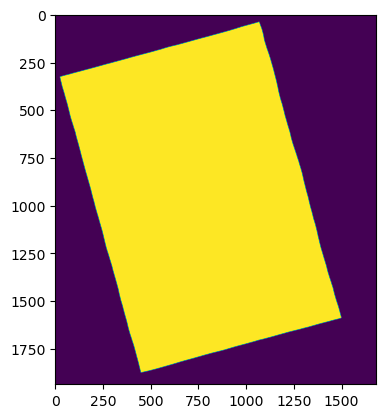

calculated boundary at frame 100


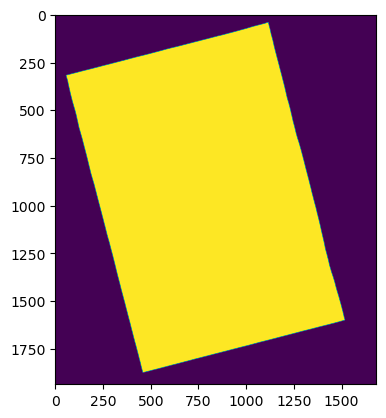

calculated boundary at frame 150


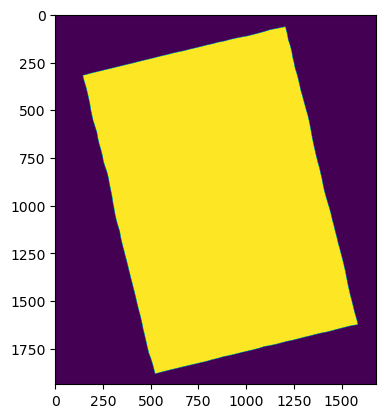

calculated boundary at frame 200


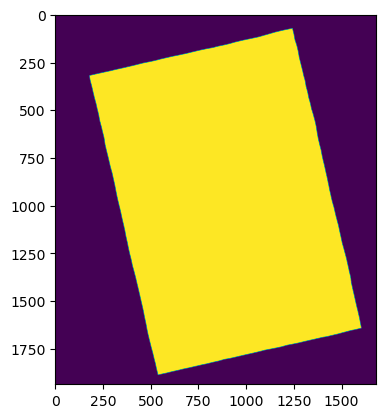

calculated boundary at frame 250


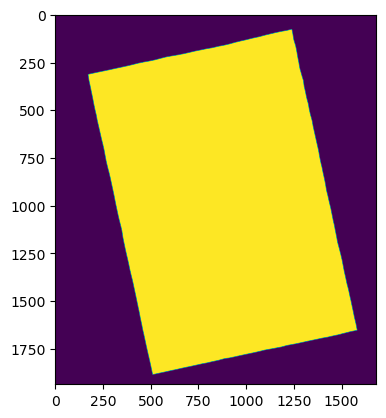

calculated boundary at frame 300


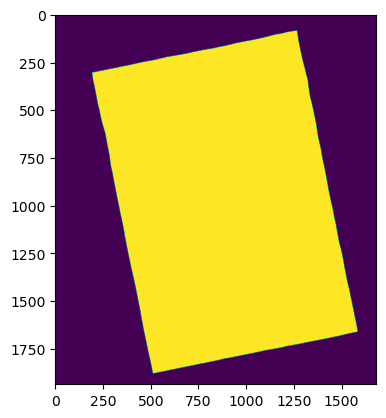

calculated boundary at frame 350


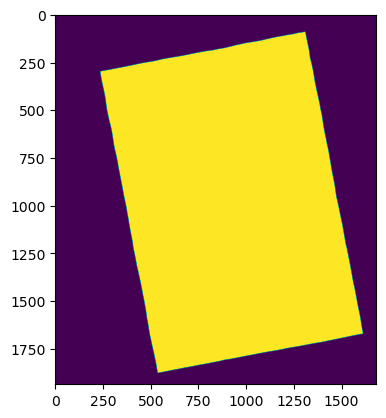

calculated boundary over folowing frames range(0, 400, 50)
Boundary
Blue=Outside, yellow=Inside


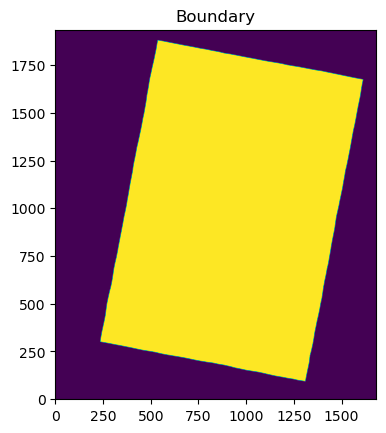

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaK = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaK.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='CaK17_9u', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search_overlap', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# CaK.datacube
# np.shape(CaK.datacube), CaK.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaK.boundary


In [15]:
# CaK.calculate__FOV_spect_over_time()

In [16]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaK.shape=}')

Not official start flare defined for CaK17_9u falling back to first of TIME[0], the execpt_time 09:04:21.79595.
the mean cadence is 7.54636591478696 seconds for this line!
CaK.shape=(400, '??', 20, 1936, 1681)


The guessed filters are [[2.8333333333333335, 2.5], [9.5, 2.5], [16.166666666666668, 2.5]]


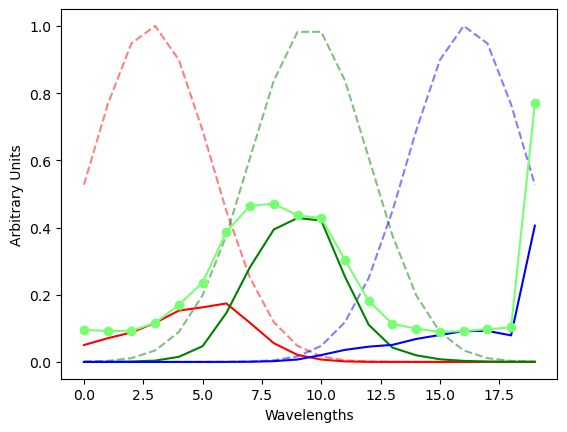

In [17]:
# %matplotlib inline
CaK.update_filters(None)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

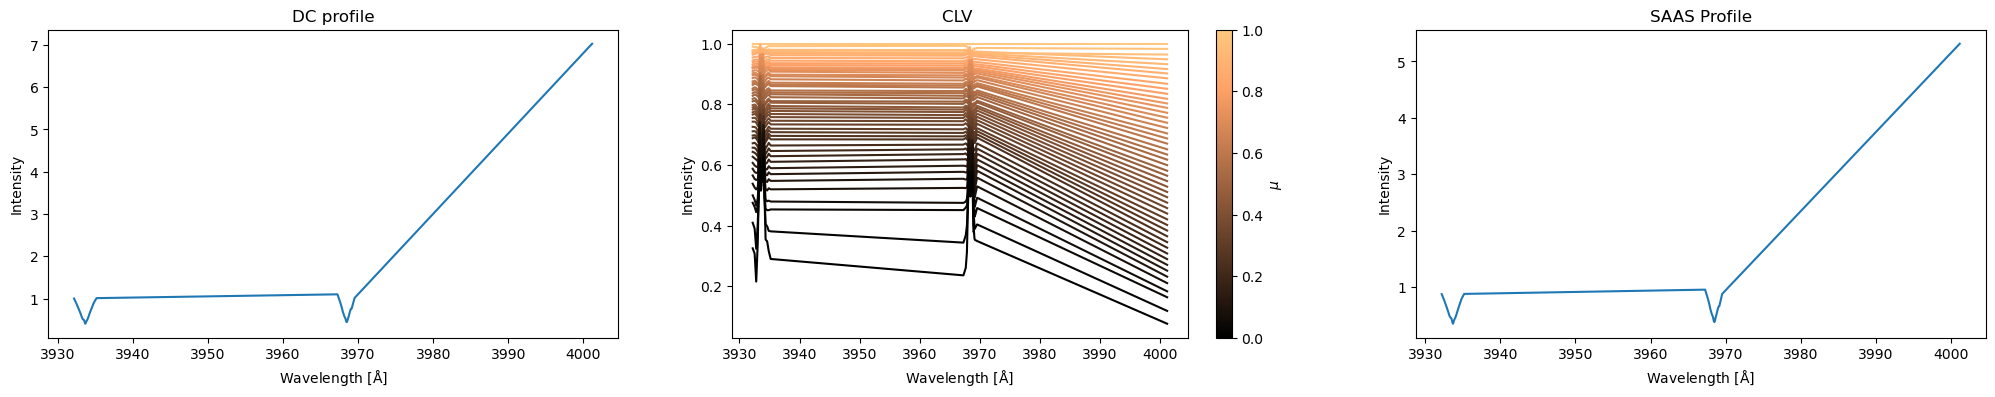

3935.025480025824 3951.030569782743


In [18]:
reload(un)
theor_CaK = un.linestudier('final_3950.npy', atlas=None, nr=101, neglect_atlas=True)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [19]:
CaK.shape

(400, '??', 20, 1936, 1681)

In [20]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaK.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Wed Apr 26 17:35:06 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1681 / Number of positions along axis 1              
 NAXIS2  =                 1936 / Number of positions along axis 2              
 NAXIS3  =                   20 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  400 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2023-04-28T10:29:57' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-PRSTEP1;PRSTEP1,VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRREF1;PRRE&
'CONTINUE  'F1,VAR-EXT-DATE-B

In [21]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [22]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
np.shape(xy), xy[maximum//2,0], fxp, fyp

((400, 20, 2, 2, 2),
 array([[[ 489.80602867, -257.69631662],
         [ 553.47802867, -257.69631662]],
 
        [[ 489.80602867, -184.35981662],
         [ 553.47802867, -184.35981662]]], dtype='>f8'),
 array([ 489.80602867,  553.47802867, -257.69631662, -184.35981662]),
 array([-257.69631662, -184.35981662], dtype='>f8'))

width = 117.55250000000001
[ 489.80602867  553.47802867 -257.69631662 -184.35981662]


does MU contain nan's? False


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8047112803862739 for timeframe 10
Coundourplot succesfully saved.


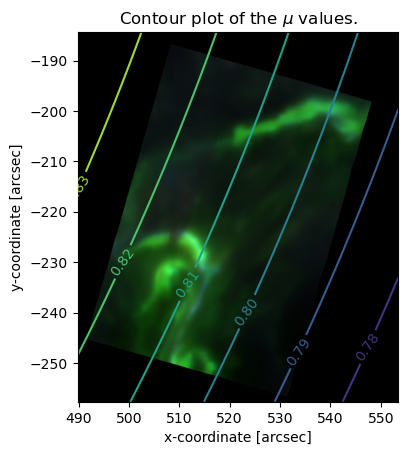

In [25]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaK.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec



print(fxp)

x = np.linspace(fxp[0], fxp[1], CaK.shape[4])
y = np.linspace(fyp[0], fyp[1], CaK.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, Show=False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaK, save=True, save_name=CaK.name_of_line, timeFrame=10)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)


(194, 169) (194, 169) (193, 168)


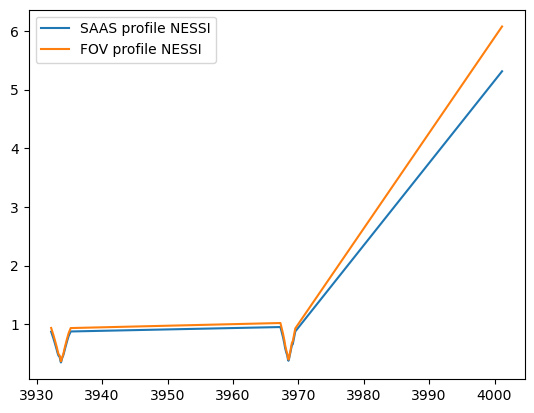

In [26]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13272\4177751771.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


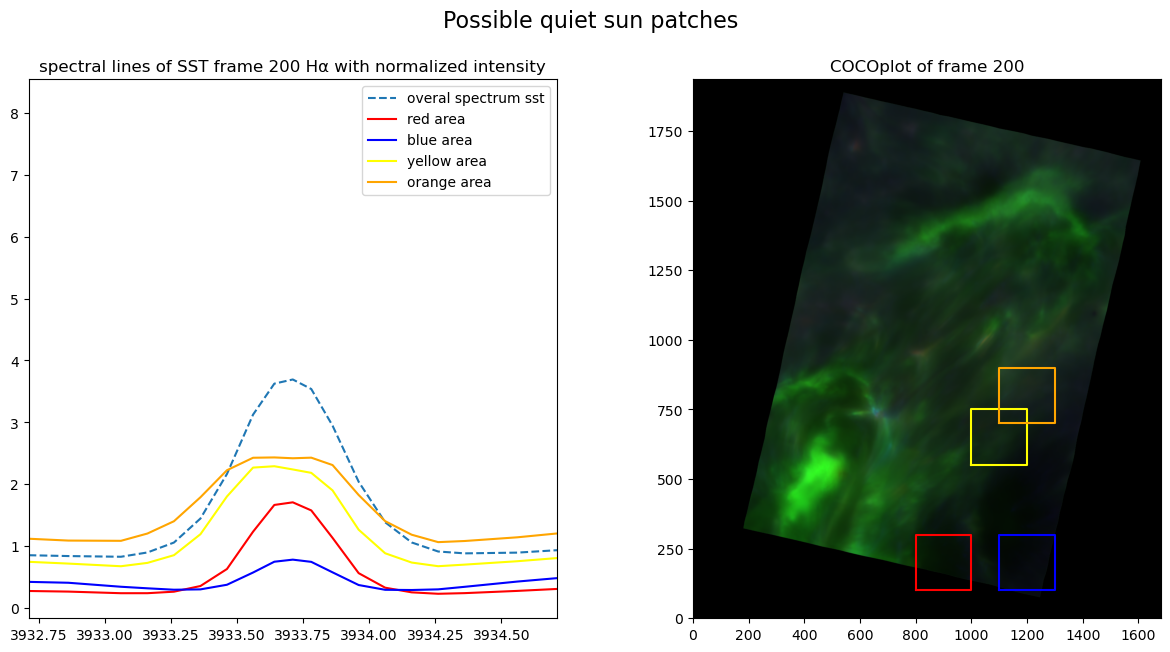

In [30]:
frame=200

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(100,300)], [(1100,1300), (100, 300)],  [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
ax[0].set_xlim((np.min(CaK._wavel), np.max(CaK._wavel[:-1])))



ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [31]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (100, 300)


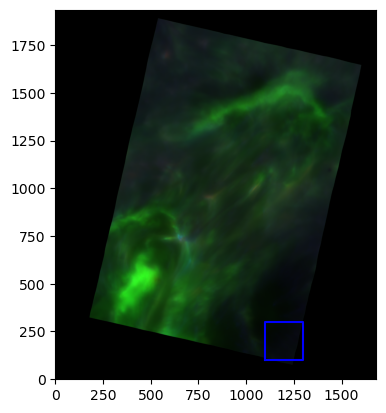

{'frame': 200, 'xlim': (1100, 1300), 'ylim': (100, 300), 'color': 'blue'}

In [32]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaK.quiet_sun

The quiet sun is pick at x (535.2670786748771, -250.13526662157824) with average              mu 0.787993304690213


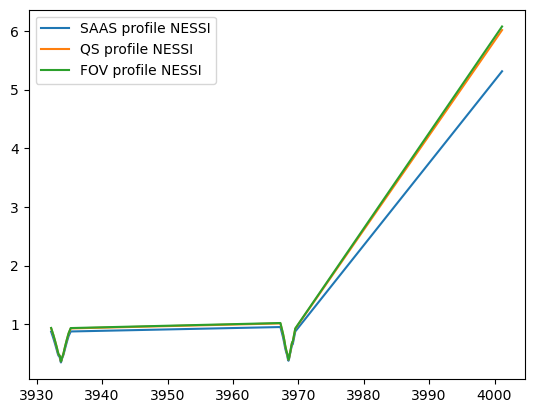

In [33]:
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim)


the theta fit is  [0, 0, 0.3740893514745076]


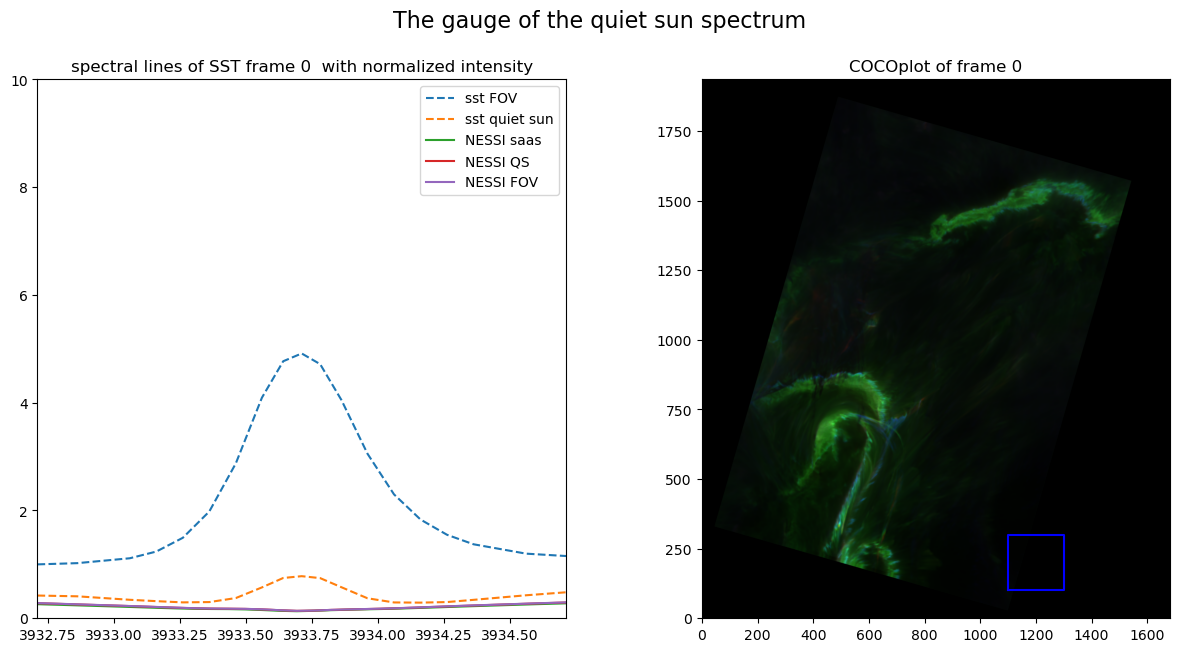

In [34]:
reload(un)
un.fit_qs_to_NESSI_cont_point(theor_CaK, CaK,  frame=0, xshift=0)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [35]:
sst_data = CaK
CaK.shape

(400, '??', 20, 1936, 1681)

In [36]:
CaK.calculate__FOV_spect_over_time()

In total 400 frames.
Now calculating frame:
399

In [37]:
sst_data.quiet_sun

{'frame': 200, 'xlim': (1100, 1300), 'ylim': (100, 300), 'color': 'blue'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [38] at time ['t=09:09:14 UT'].
The SST data runs from t=09:04:21 UT to t=09:54:32 UT.
The areafactor for THIS flare is 0.000873989314702068 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 70.24%.


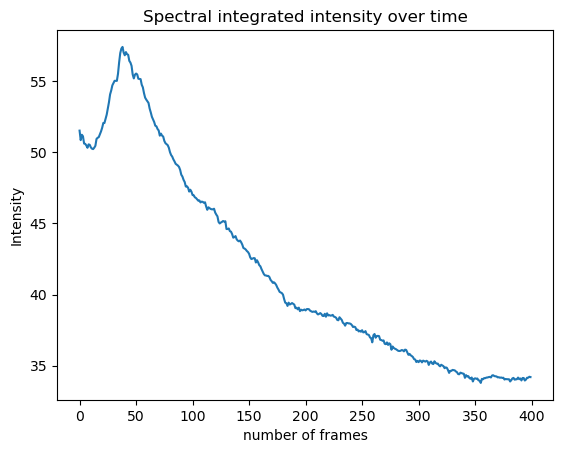

In [38]:
reload(un)
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

[0, 0, 0.3740893514745076]
Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, 09:04:21.79595, total number of frames: 400 


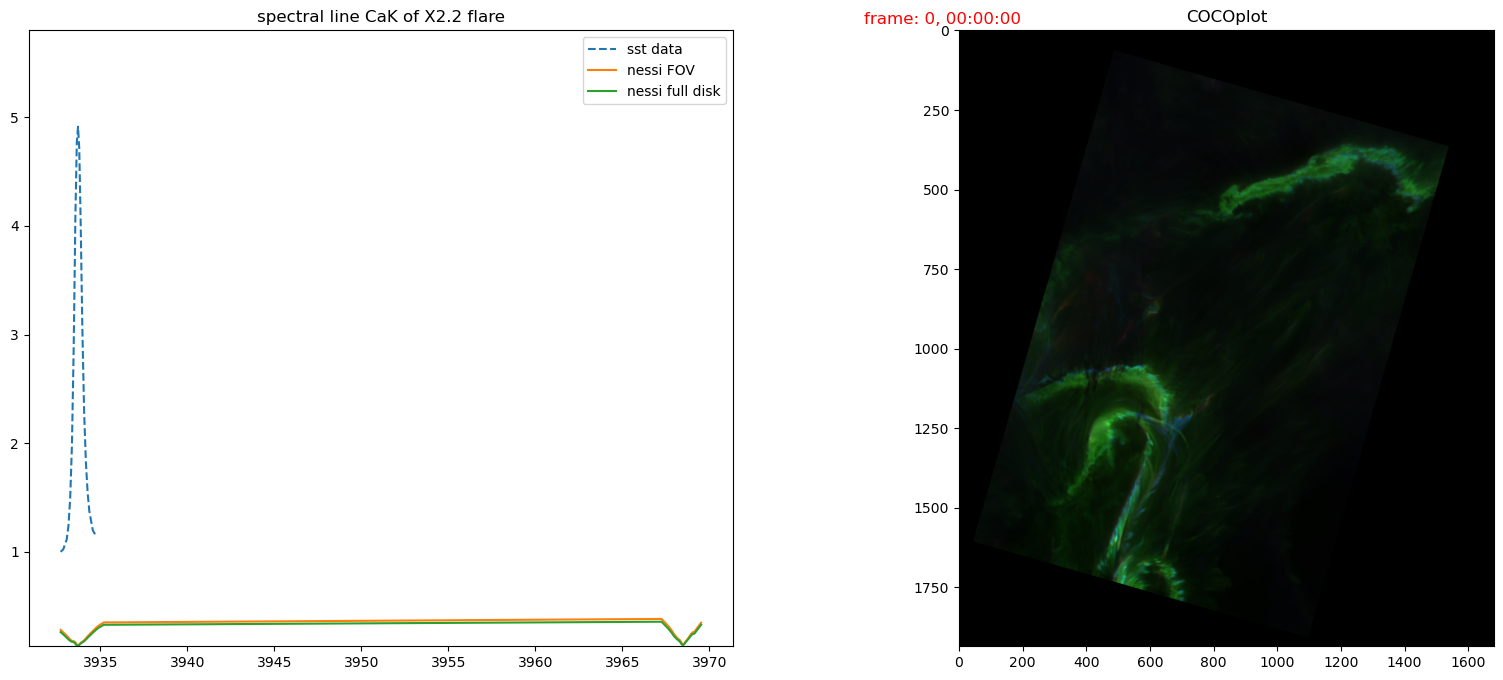

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [39]:
# fill in here all arguments
theor_line = theor_CaK
sst_data = CaK
name_of_flare = "X2.2"
name_of_line = "CaK"
step=True
show_boundary=False

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step, show_boundary)